## Lab 5 Land Classification

### By: Ashley Butikofer

In [1]:
import ee
ee.Initialize()

import geemap
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [2]:
point = ee.Geometry.Point([-111.833839, 41.736980])

landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate('2021-05-01', '2021-07-31') \
    .sort('CLOUD_COVER') \
    .first() \
    .select('SR_B[1-7]')

landsat = landsat.multiply(0.0000275).add(-0.2)


vis_params = {
    'min': 0,
    'max': 0.2,
    'bands': ['SR_B5', 'SR_B4', 'SR_B3']
}

In [3]:
Map.centerObject(point, 8)
Map.addLayer(landsat, vis_params, 'false color composite')

Map


Map(bottom=754.0, center=[41.73698, -111.83383900000001], controls=(WidgetControl(options=['position', 'transp…

In [4]:
img_name ='ndvi'
ndvi=landsat.normalizedDifference(['SR_B5', 'SR_B4'])

vis_params = {
  'min': -0.2,
  'max': 1.0,
  'palette': ['blue','white','brown','yellow', 'lime', 'green','navy']}

Map.addLayer(ndvi,vis_params,img_name)

colors = vis_params['palette']
vmin = vis_params['min']
vmax = vis_params['max']

Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name=img_name)

Map

Map(bottom=24692.0, center=[41.73698, -111.83383900000001], controls=(WidgetControl(options=['position', 'tran…

## Bare Soil

In [7]:
polygon = ee.Geometry.Polygon([
                   [-112.404, 41.531],
                   [-112.401, 41.531],
                   [-112.401, 41.529],
                   [-112.404, 41.529]]);

# // Create a Feature from the Geometry.
baresoil = ee.Feature(polygon, {'class': 2, 'name': 'baresoil'});
Map.addLayer(baresoil, {'fill_color':'yellow', 'outline': 1}, name='baresoil')
Map

Map(bottom=12514873.0, center=[41.531093688196115, -112.40295231342317], controls=(WidgetControl(options=['pos…

In [9]:
polygon = ee.Geometry.Polygon([
                   [-110.640, 41.508],
                   [-110.6363, 41.508],
                   [-110.6363, 41.5052],
                   [-110.640, 41.5052]]);

# // Create a Feature from the Geometry.
baresoil1 = ee.Feature(polygon, {'class': 2, 'name': 'baresoil1'});
Map.addLayer(baresoil1, {'fill_color':'yellow', 'outline': 1}, name='baresoil1')
Map

Map(bottom=6259040.0, center=[41.507741718731985, -110.64254879951478], controls=(WidgetControl(options=['posi…

In [14]:
polygon = ee.Geometry.Polygon([
                   [-111.988, 42.014],
                   [-111.9869, 42.014],
                   [-111.9869, 42.0130],
                   [-111.988, 42.0130]]);

# // Create a Feature from the Geometry.
baresoil2 = ee.Feature(polygon, {'class': 2, 'name': 'baresoil2'});
Map.addLayer(baresoil2, {'fill_color':'yellow', 'outline': 1}, name='baresoil2')

Map

Map(bottom=49052.0, center=[41.80407814427237, -111.22695922851564], controls=(WidgetControl(options=['positio…

## Vegetation

In [17]:
polygon = ee.Geometry.Polygon([
                 [-111.984, 42.1303],
                 [-111.9826, 42.1303],
                 [-111.9826, 42.129],
                 [-111.984, 42.129]]);

vegetation = ee.Feature(polygon, {'class': 1, 'name': 'vegetation'});
Map.addLayer(vegetation, {'fill_color':'green', 'outline': 1}, name='vegetation')
Map


Map(bottom=12440171.0, center=[42.128283074354705, -111.98413074016572], controls=(WidgetControl(options=['pos…

In [21]:
polygon = ee.Geometry.Polygon([
                 [-111.600, 41.8865],
                 [-111.598, 41.8865],
                 [-111.598, 41.885],
                 [-111.600, 41.885]]);

vegetation1 = ee.Feature(polygon, {'class': 1, 'name': 'vegetation1'});
Map.addLayer(vegetation1, {'fill_color':'green', 'outline': 1}, name='vegetation1')
Map

Map(bottom=12470658.0, center=[41.88523411175726, -111.59809648990633], controls=(WidgetControl(options=['posi…

In [24]:
polygon = ee.Geometry.Polygon([
                 [-111.051, 42.2541],
                 [-111.049, 42.2541],
                 [-111.049, 42.253],
                 [-111.051, 42.253]]);

vegetation2 = ee.Feature(polygon, {'class': 1, 'name': 'vegetation2'});
Map.addLayer(vegetation2, {'fill_color':'green', 'outline': 1}, name='vegetation2')
Map

Map(bottom=12424473.0, center=[42.25306866804132, -111.0487049818039], controls=(WidgetControl(options=['posit…

## Water

In [28]:
polygon = ee.Geometry.Polygon([
                   [-111.3108, 42.076],
                   [-111.309, 42.076],
                   [-111.309, 42.075],
                   [-111.3108, 42.075]]);

# // Create a Feature from the Geometry.
water = ee.Feature(polygon, {'class': 0, 'name': 'water'});
Map.addLayer(water, {'fill_color':'blue', 'outline': 1}, name='water')
Map


Map(bottom=24893376.0, center=[42.07521164063452, -111.30889803171159], controls=(WidgetControl(options=['posi…

In [33]:
polygon = ee.Geometry.Polygon([
                   [-112.6723, 41.255],
                   [-112.666, 41.255],
                   [-112.666, 41.252],
                   [-112.6723, 41.252]]);

# // Create a Feature from the Geometry.
water1 = ee.Feature(polygon, {'class': 0, 'name': 'water1'});
Map.addLayer(water1, {'fill_color':'blue', 'outline': 1}, name='water1')
Map

Map(bottom=6274974.0, center=[41.251193368676326, -112.66306757926942], controls=(WidgetControl(options=['posi…

In [37]:
polygon = ee.Geometry.Polygon([
                   [-112.080, 41.3975],
                   [-112.077, 41.3975],
                   [-112.077, 41.395],
                   [-112.080, 41.395]]);

# // Create a Feature from the Geometry.
water2 = ee.Feature(polygon, {'class': 0, 'name': 'water2'});
Map.addLayer(water2, {'fill_color':'blue', 'outline': 1}, name='water2')
Map

Map(bottom=98298.0, center=[41.29638081886435, -111.98432922363283], controls=(WidgetControl(options=['positio…

#### Create feature collection

In [38]:
trainingFeatures = ee.FeatureCollection([water, water1, water2, vegetation, vegetation1, vegetation2, baresoil, baresoil1, baresoil2])

In [39]:
predictionBands = ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5' ,'SR_B6','SR_B7']

#### Class Number Info

In [40]:
print(trainingFeatures.first().getInfo())

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-111.3108, 42.075], [-111.309, 42.075], [-111.309, 42.076], [-111.3108, 42.076], [-111.3108, 42.075]]]}, 'id': '0', 'properties': {'class': 0, 'name': 'water'}}


In [41]:
classifierTraining = landsat.select(predictionBands).sampleRegions(
      collection= trainingFeatures, 
      properties= ['class'], 
      scale= 30
    );

In [42]:
# // Randomly split the data into 60% for training, and 40% for testing
trainingTesting = classifierTraining.randomColumn('random',111009);

training = trainingTesting.filter(ee.Filter.lt('random', 0.66));

testing = trainingTesting.filter(ee.Filter.gte('random', 0.66));

## Nonlinear Regression Functions

In [43]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/vROsEiq.png")#, width=100, height=100)

### Cart

In [79]:
leaf_val=1

cartclassifier = ee.Classifier.smileCart(minLeafPopulation=leaf_val).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    );

In [80]:
cartClasifficationImage = landsat.select(predictionBands).classify(cartclassifier);

Map.addLayer(cartClasifficationImage, {'min': 0, 'max': 2,
                                   'palette':['blue', 'green','yellow']},'CART classification');
Map

Map(bottom=24647.0, center=[41.92271616673922, -111.26129150390626], controls=(WidgetControl(options=['positio…

### Forest

In [73]:
trees_val=13

rfClassification = ee.Classifier.smileRandomForest(numberOfTrees=trees_val, seed=111009).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )

In [74]:
rfClassificationImage = landsat.select(predictionBands).classify(rfClassification);
    
# // Visualize the RF regression
Map.addLayer(rfClassificationImage,  {'min': 0, 'max': 2,
                                   'palette':['blue','green', 'yellow']}, 'RF classification');

Map

Map(bottom=24647.0, center=[41.92271616673922, -111.26129150390626], controls=(WidgetControl(options=['positio…

### SVC

In [63]:
gamma_val =0.16

# // Create an SVM classifier with custom parameters.
svClassification = ee.Classifier.libsvm(svmType='C_SVC',kernelType='RBF',gamma=gamma_val).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )

In [64]:
svClassificationImage = landsat.select(predictionBands).classify(svClassification);
    
# // Visualize the RF regression
Map.addLayer(svClassificationImage,{'min': 0, 'max': 2,
                                   'palette':['blue', 'green','yellow']}, 'SV CLassification');
Map

Map(bottom=24647.0, center=[41.92271616673922, -111.26129150390626], controls=(WidgetControl(options=['positio…

## Confusion Matrix

In [50]:
test=testing.classify(cartclassifier)
# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
testAccuracy = test.errorMatrix('class', 'classification');

In [51]:
import numpy as np
errormaxtrix=np.array(testAccuracy.array().getInfo())

print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());


ConfusionMatrix
[[96  0  0]
 [ 0 22  0]
 [ 0  0 61]]
Overall Accuracy: 1
Producers Accuracy: [[1], [1], [1]]
Consumers Accuracy: [[1, 1, 1]]
Kappa: 1


In [52]:
test=testing.classify(rfClassification)
# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
testAccuracy = test.errorMatrix('class', 'classification');

errormaxtrix=np.array(testAccuracy.array().getInfo())

print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());

ConfusionMatrix
[[96  0  0]
 [ 0 22  0]
 [ 0  0 61]]
Overall Accuracy: 1
Producers Accuracy: [[1], [1], [1]]
Consumers Accuracy: [[1, 1, 1]]
Kappa: 1


In [53]:
test=testing.classify(svClassification)
# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
testAccuracy = test.errorMatrix('class', 'classification');

errormaxtrix=np.array(testAccuracy.array().getInfo())

print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());

ConfusionMatrix
[[96  0  0]
 [ 5 17  0]
 [ 0  0 61]]
Overall Accuracy: 0.9720670391061452
Producers Accuracy: [[1], [0.7727272727272727], [1]]
Consumers Accuracy: [[0.9504950495049505, 1, 1]]
Kappa: 0.9509589041095889


## Hyperparameter Tuning

#### Forest

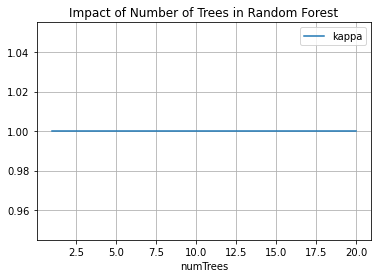

In [54]:
numTrees = ee.List.sequence(1, 20, 1)


def trees(t):
    rfclass = ee.Classifier.smileRandomForest(numberOfTrees=t, seed=111009).train(
    features= training, 
    classProperty= 'class', 
    inputProperties= predictionBands)
    
    rfTesting = testing.classify(rfclass)
    testAccuracy = rfTesting.errorMatrix('class', 'classification');
    kappa= testAccuracy.kappa();       
    return kappa


kappa_trees=numTrees.map(trees)
value_info = kappa_trees.getInfo()

# print(rmse_trees.getInfo())

import pandas as pd
df =pd.DataFrame(value_info,columns=['kappa'])
df['numTrees'] = numTrees.getInfo() 

ax =df.plot.line(x='numTrees', 
             y='kappa',
             title= 'Impact of Number of Trees in Random Forest'
             )
ax.grid()

#### SVC

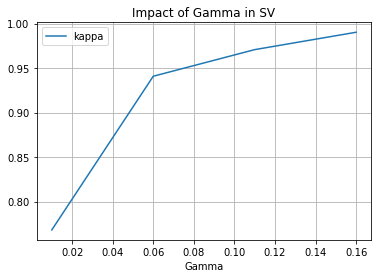

In [55]:
gamma_vals = ee.List.sequence(0.01, 0.2, 0.05)


def gammas(t):
    svclass = ee.Classifier.libsvm(svmType='C_SVC',kernelType='RBF',gamma=t).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )
    
    svTesting = testing.classify(svclass)
    testAccuracy = svTesting.errorMatrix('class', 'classification');
    kappa= testAccuracy.kappa();       
    return kappa


kappa_gama=gamma_vals.map(gammas)
value_info = kappa_gama.getInfo()

# print(rmse_gama.getInfo())

import pandas as pd
df =pd.DataFrame(value_info,columns=['kappa'])
df['Gamma'] = gamma_vals.getInfo() 

ax =df.plot.line(x='Gamma', 
             y='kappa',
             title= 'Impact of Gamma in SV'
             )
ax.grid()

#### Cart

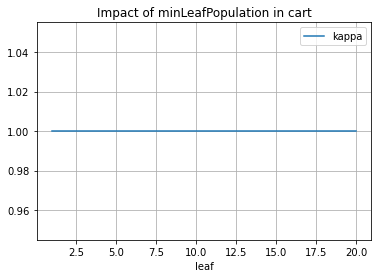

In [56]:
leaf_vals = ee.List.sequence(1, 20, 1)


def leaves(t):
    cartclass= ee.Classifier.smileCart(minLeafPopulation=t).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )
    
    cartTesting = testing.classify(cartclass)
    testAccuracy = cartTesting.errorMatrix('class', 'classification');
    kappa= testAccuracy.kappa();       
    return kappa


kappa_leaf=leaf_vals.map(leaves)
value_info = kappa_leaf.getInfo()

# print(rmse_gama.getInfo())

import pandas as pd
df =pd.DataFrame(value_info,columns=['kappa'])
df['leaf'] = leaf_vals.getInfo() 

ax =df.plot.line(x='leaf', 
             y='kappa',
             title= 'Impact of minLeafPopulation in cart'
             )
ax.grid()

 ### Homework Question:
 Recreate this notebook for Logan UT, and add 3 more polygons that describe soil, vegetation and water (there must be 3 polygons per class). Make sure your CART, SVC and Random Forest uses the tuned hyperparameters when discussing your accuracy found. 
 
 Are the models behaving similarly? Do they statistically perform different than this example? Discuss it.

### ANSWER:

When running the hyperparameter tuning, the results show the highest accuracy of the SVC model at a value of 0.16 gamma. The model performed better at 0.16 than 0.1 by showing more vegetation instead of water in the vegetation areas. The Cart and Random Forest models both show equal accuracy at all values of the parameters. The confusion matrix accuracies show values above 95% for SVC, and the RF and Cart at 100%. The model that seems to work the best is the Random Forest model. It has high accuracy in the hyperparamter as well as confusion matrix and visually matches the NDVI map best. 

The Random Forest model in the Lab 5 example also had 100% accuracy in the confusion matrix. There was about 89% accuracy for SVC and 97% for Cart in the confusion matrices. The hyperparameters were highly accurate above the value 0.06 for the SVC model, above 5.0 for the Random Forest model and values below 17 for the Cart model. When using the hyperparamter tuning, the model that works the best for land classification was the Random Forest for the lab 5 example. The Cart model showed some water classification in vegetation areas and vice versa. The SVC model showed mostly water classification and little vegetation.

The land classification worked better with multiple polygons than single polygons for each class. The confusion matrices were more successful in the multiple polygon classification than the single polygon classification. 